In [1]:
# Preamble to always run
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import eleganttool
import subprocess
from matplotlib import rc
import os 
import sys
import h5py
import scipy.constants as sc
from IPython.display import Markdown
from opal import load_dataset
import opal

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3
cms = sc.c

FontSize=16  
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', size = FontSize)

In [2]:
# plotting emittance and rms size output from opal cathode to yag 4
base = '/lstr/sahara/aard/cphillips/'

# base + what kind of charge + num_beams + gun 2 y4 + best of hof
charge = base + '1nC/1beam/1cath2y4/bebop/ACF8B9D2D5454154/'
charge = base + '1nC/1beam/1cath2y4/metis_try3/21ADFB0FC43A4AE0/' # *****
#charge = base + '2nC/1beam/1cath2y4/metistry2/01E5F170CFE04D21/' # first case in HOF
#charge = base + '5nC/1beam/1cath2y4/metistry2/0493E3077B534387/' # *****; also first case in HOF

# Optimizing for 2 beam
#charge = base + '1nC/2beam/1cath2y4/optimizedrive/eK/C480556D5BB84BD5/'
#charge = base + '1nC/2beam/1cath2y4/optimizedrive/KN/E2348A34006441A1/'
#charge = base + '1nC/2beam/1cath2y4/optimizedrive/KN/9B46A548455F41ED/'
#charge = base + '1nC/2beam/1cath2y4/centeredsqua/drive/oncrest/1p5lambda/'
#charge = base + '1nC/2beam/1cath2y4/timescan/301steps/tstep_50/'

filename = charge+'input.stat'
#filename = charge+'input_1p5lambda.stat'
h5file = charge+'YAG4.h5'

ds = load_dataset('./', fname = filename)
print(ds)

s = ds.getData('s') # path length
h5dat = h5py.File(h5file,'r')


	Statistic dataset.

	Size: 46 x 4203

	Available variables (46) :

	Bx_ref              	 Bx-Field component of ref particle
	By_ref              	 By-Field component of ref particle
	Bz_ref              	 Bz-Field component of ref particle
	DDx                 	 Derivative of dispersion in x
	DDy                 	 Derivative of dispersion in y
	DebyeLength         	 Debye length in the boosted frame
	Dx                  	 Dispersion in x
	Dy                  	 Dispersion in y
	Ex_ref              	 Ex-Field component of ref particle
	Ey_ref              	 Ey-Field component of ref particle
	Ez_ref              	 Ez-Field component of ref particle
	charge              	 Bunch Charge
	dE                  	 energy spread of the beam
	dt                  	 time step size
	emit_s              	 Normalized Emittance s
	emit_x              	 Normalized Emittance x
	emit_y              	 Normalized Emittance y
	energy              	 Mean Bunch Energy
	max_s               	 Max Beamsize in s

Data for Full Sim Information: 
x rms =  0.0007533677894723417
y rms =  0.0007458753196972263
s rms =  0.0009931061798993269
ps rms =  0.4007320456398534
emit x =  2.815700743790038e-06
emit y =  2.82705528676074e-06
emit s =  6.164610583961824e-05
Num parts =  30000
kinetic energy =  49.29866950922617
bunch charge =  -1.000000000000264e-09
emittance =  2.815700743790038e-06 2.82705528676074e-06
bunch length =  0.0009931061798993269
energy spread =  0.2047628850689887
final beta x:  20.66778267312215
[15052 15220 15395 15559 15704 15869 16025 16201 16372 16563 16747 16919
 17051 17227 17401 17576 17757 17936 18088 18243 18411 18558 18717 18878
 19032 19200 19372 19533 19715 19873 20042 20204 20365 20527 20679 20835
 20978 21153 21314 21480 21657 21810 21982 22161 22327 22481 22651 22798
 22971 23158 23318 23488 23645 23810 23952 24119 24256 24424 24574 24742
 24929 25100 25276 25449 25621 25809 26001 26171 26354 26514 26687 26875
 27033 27178 27321 27504 27691 27863 28049 28228 28398 2

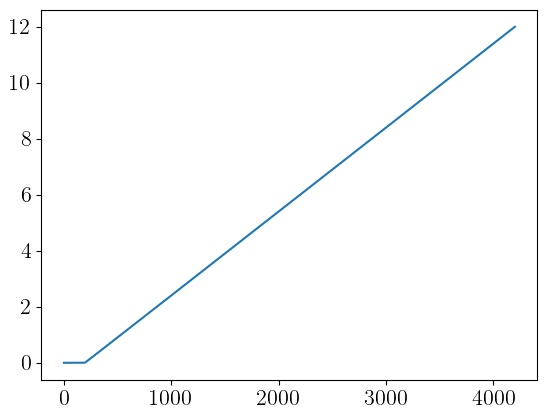

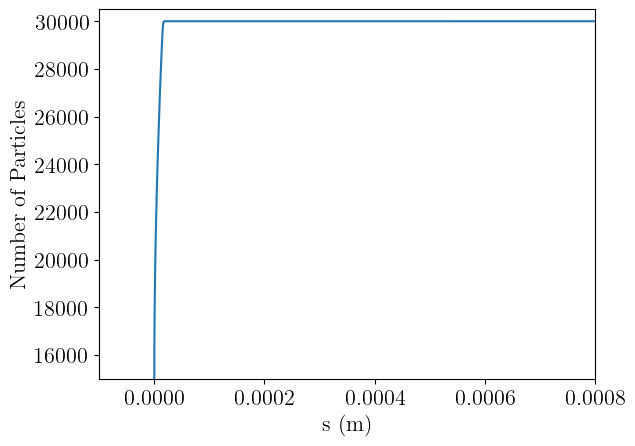

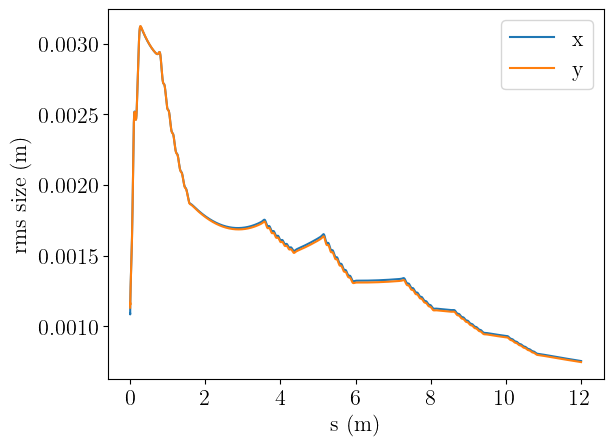

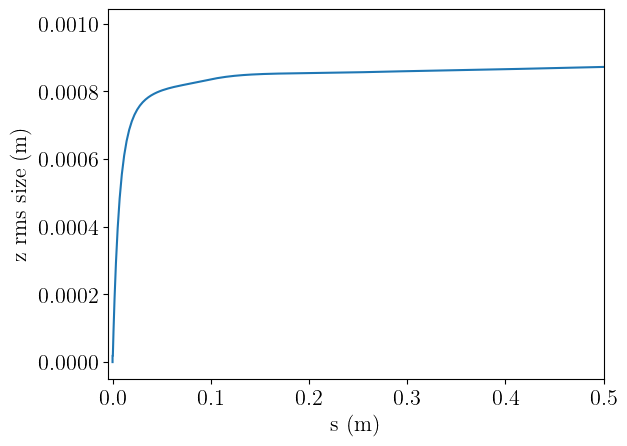

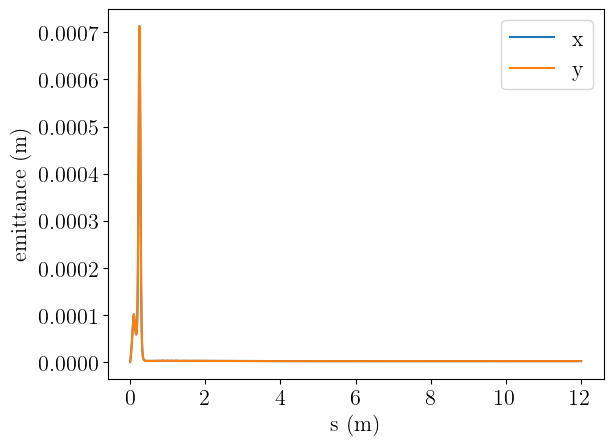

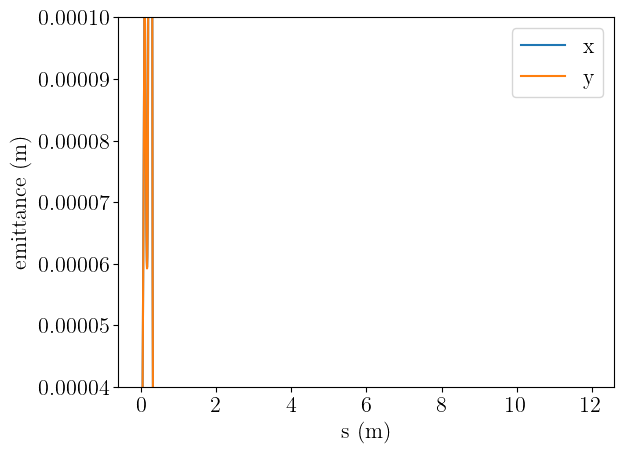

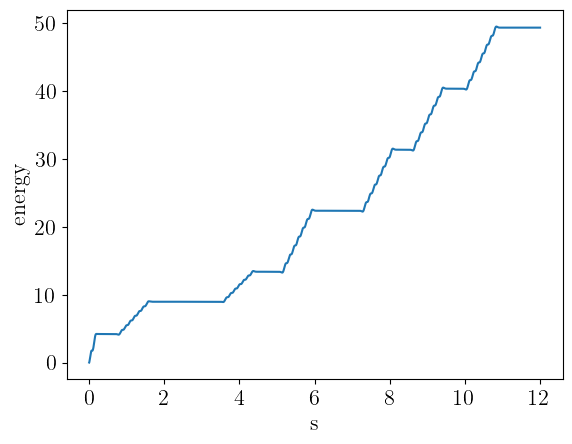

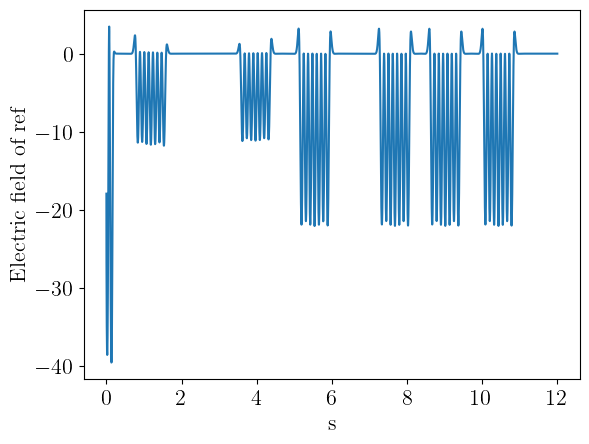

In [5]:
rmsx = ds.getData('rms_x') # m
rmsy = ds.getData('rms_y')
rmss = ds.getData('rms_s')
rmsps = ds.getData('rms_ps')
emitx = ds.getData('emit_x') # normalized emittance x
emity = ds.getData('emit_y') # m
emits = ds.getData('emit_s')
kene = ds.getData('energy')
nparts = ds.getData('numParticles')

print('Data for Full Sim Information: ')
print('x rms = ', rmsx[-1])
print('y rms = ', rmsy[-1])
print('s rms = ', rmss[-1])
print('ps rms = ', rmsps[-1])
print('emit x = ', emitx[-1])
print('emit y = ', emity[-1])
print('emit s = ', emits[-1])
print('Num parts = ', nparts[-1])
print('kinetic energy = ', kene[-1])
print('bunch charge = ',ds.getData('charge')[-1])
print('emittance = ',emitx[-1],emity[-1])
print('bunch length = ',rmss[-1])
print('energy spread = ',ds.getData('dE')[-1])


#pthlen = ds.getData('s')
#time = ds.getData('t')

lts = h5dat['Step#0']
xs = lts['x'][:]
pz = lts['pz'][:]
emitxs = ds.getData('emit_x')[-1]
betaxs = np.average(xs**2)/(emitxs/np.average(pz))
print('final beta x: ', betaxs)

print(nparts[93:200])
print(s[93:200])
print(s[0],s[-1])
print(len(nparts))

evens = np.linspace(0,s[-1],len(s))

plt.figure()
plt.plot(s)
plt.show()

plt.figure()
plt.plot(s,nparts)
plt.xlim([-0.0001,.0008])
plt.ylim([15000,30500])
plt.xlabel('s (m)')
plt.ylabel('Number of Particles')
plt.show()

plt.figure()
plt.plot(s,rmsx,label='x')
plt.plot(s,rmsy,label='y')
#plt.plot(s,rmss, label='s')
plt.xlabel('s (m)')
plt.ylabel('rms size (m)')
plt.legend()
plt.show()

plt.figure()
plt.plot(s,rmss)
plt.xlim([-.005,.5])
plt.xlabel('s (m)')
plt.ylabel('z rms size (m)')
plt.show()

plt.figure()
plt.plot(s,emitx,label='x')
plt.plot(s,emity,label='y')
plt.xlabel('s (m)')
plt.ylabel('emittance (m)')
plt.legend()
plt.show()

plt.figure()
plt.plot(s,emitx,label='x')
plt.plot(s,emity,label='y')
#plt.plot(s[nu:],emitz[nu:],label='z')
plt.xlabel('s (m)')
plt.ylabel('emittance (m)')
plt.ylim([0.00004,0.0001])
plt.legend()
plt.show()

plt.figure()
plt.plot(s,ds.getData('energy'))
plt.xlabel('s')
plt.ylabel('energy')
#plt.savefig('energy.png')
plt.show()

plt.figure()
plt.plot (s, ds.getData('Ez_ref'))
#plt.plot (s, ds.getData('Ex_ref'))
#plt.plot (s, ds.getData('Ey_ref'))
plt.xlabel('s')
plt.ylabel('Electric field of ref')
#plt.savefig('Ez_ref.png')
plt.show()

#plt.figure()
#plt.scatter(pthlen,time)
#plt.xlabel('Path Length (m)')
#plt.ylabel('Time (ns)')
#plt.show()

rms bunch length from .stat file:  0.0009931061798993269  m
bunch length from calc:  0.0009929702468603249  m
z mean:  11.58790463959388  m


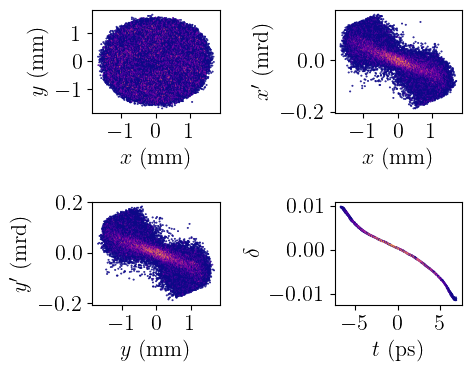

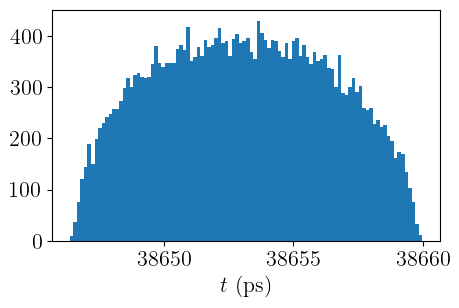

In [6]:
lts = h5dat['Step#0']
xs = lts['x'][:]
ys = lts['y'][:]
zs = lts['z'][:]
px = lts['px'][:]
py = lts['py'][:]
pz = lts['pz'][:]
px = px/pz
py = py/pz
ts = lts['time'][:]

p = np.sqrt(px**2+py**2+pz**2)
p = p/p.mean()-1

tsmean = np.mean(ts)
tszeroed = ts-tsmean

print('rms bunch length from .stat file: ',rmss[-1],' m')
lenx = len(ts)
z_parts = ts*cms
zmean = np.mean(z_parts)
centz = [(i-zmean)**2 for i in z_parts]
sum = np.sum(centz)
rms_zlen = np.sqrt(sum/lenx)
print('bunch length from calc: ',rms_zlen,' m')
print('z mean: ', zmean,' m')
#bulen = np.sqrt(np.average(tims**2))
#print('bunch length: ',bulen,' ns')

nBins = 201
frac = 100
MinCnt = 1+int(len(ts)-frac/100*len(ts))

fig, axlist = plt.subplots(2,2, figsize=(5, 4))
ax = axlist[0, 0]
ax.hexbin(xs*1e3, ys*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax = axlist[0, 1]
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$x\'$ (mrd)')
ax.hexbin(xs*1e3, px*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,0]
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$y\'$ (mrd)')
ax.hexbin(ys*1e3, py*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,1]
ax.hexbin(tszeroed*1e12, p, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax.set_xlabel('$t$ (ps)')
ax.set_ylabel(r'$\delta$')
plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchOpal.png')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(ts*1e12,bins=100)
plt.xlabel('$t$ (ps)')
plt.show()

In [5]:
#to get bunch length, get rms of time
# need all boxes run to calculate this
bulen = np.sqrt(np.average(ts**2))
print('bunch length: ',bulen,' ns')


betax = np.average(xs**2)/(emitx[-1]/np.average(pz))
betay = np.average(ys**2)/(emity[-1]/np.average(pz))
print('Beta x: ',betax)
print('Beta y: ',betay)

bunch length:  3.865308940539727e-08  ns
Beta x:  20.66778267312215
Beta y:  20.1705131199823



	H5 dataset.

	Number of steps: 1

	Available step attributes (18):

	#varepsilon         
	#varepsilon-geom    
	ENERGY              
	GlobalTrackStep     
	MEANP               
	RMSP                
	RMSX                
	RefPartP            
	RefPartR            
	SPOS                
	TIME                
	TotalCharge         
	TotalMass           
	centroid            
	dE                  
	maxR                
	meanTime            
	rmsTime             


	Available step datasets (10):

	id                  
	m                   
	px                  
	py                  
	pz                  
	q                   
	time                
	x                   
	y                   
	z                   



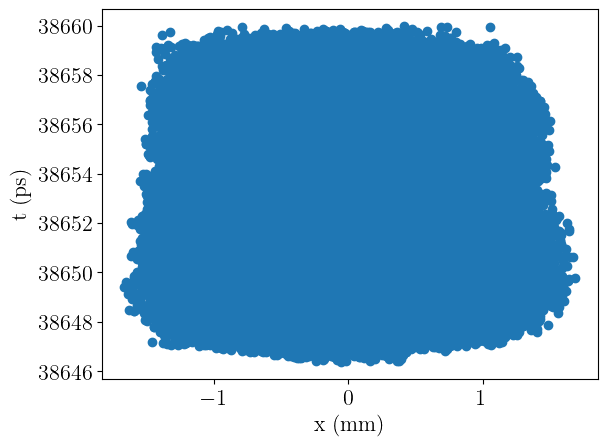

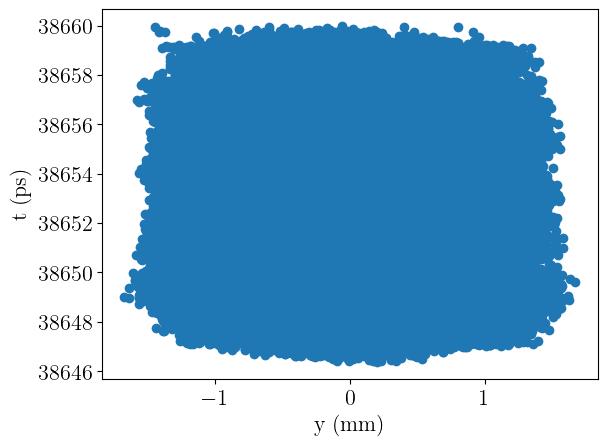

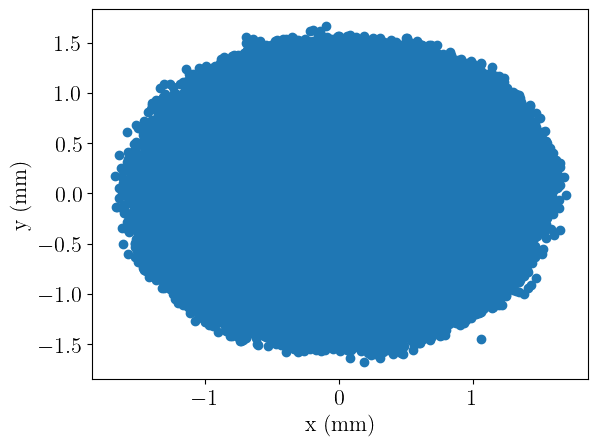

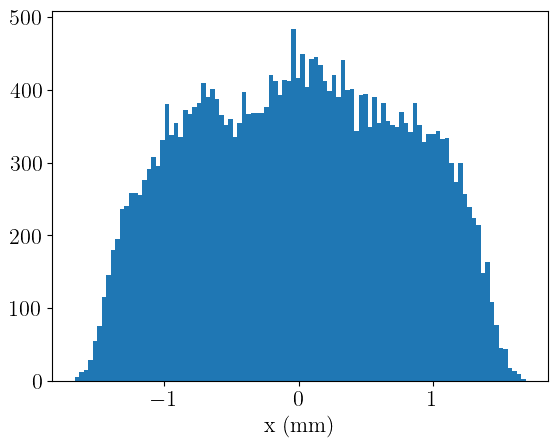

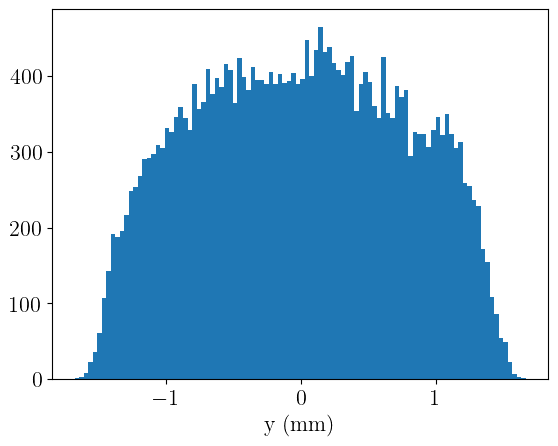

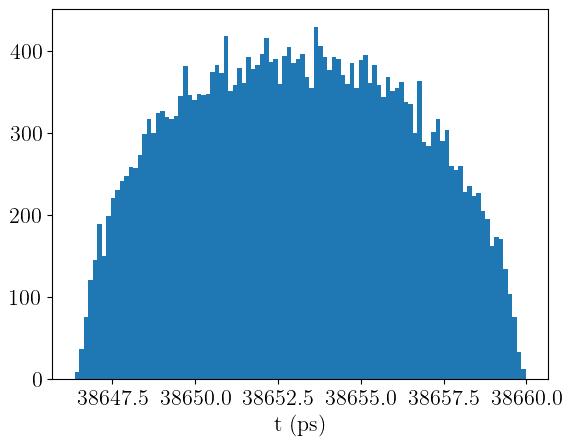

[3.86477291e-08 3.86479662e-08 3.86468477e-08 3.86479856e-08
 3.86470060e-08 3.86473011e-08 3.86471470e-08 3.86476305e-08
 3.86468285e-08 3.86467580e-08 3.86465303e-08 3.86467552e-08
 3.86475805e-08 3.86473595e-08 3.86465999e-08]
max t:  3.8659976437843827e-08  s
min t:  3.864636873256075e-08  s
mean t:  3.865308926348601e-08  s


In [15]:
# Plotting Beam from Output (x vs y vs z, and histograms)

#loc = '/lstr/sahara/aard/cphillips/bebop_opal_Eleg/1cath2y4/ACF8B9D2D5454154/' 
fil = opal.datasets.H5Dataset.H5Dataset(charge,'YAG4.h5')
print(fil)
#print(fil.getData('RMSX')[-1])

#print('energy',fil.getData('ENERGY')[-1],fil.getUnit('ENERGY'))
#print(fil.getUnit('z'),fil.getUnit('px'),fil.getUnit('py'),fil.getUnit('pz'))
#print(opal.datasets.H5Dataset.H5Dataset.getUnit('px'))



f = h5py.File(charge+'YAG4.h5','r')
lts = f['Step#0']
xs = lts['x'][:]
ys = lts['y'][:]
zs = lts['z'][:]
px = lts['px'][:]
py = lts['py'][:]
pz = lts['pz'][:]
px = px/pz
py = py/pz
ts = lts['time'][:]

plt.figure()
plt.scatter(xs*1e3,ts*1e12)
plt.xlabel('x (mm)')
plt.ylabel('t (ps)')
plt.show()

plt.figure()
plt.scatter(ys*1e3,ts*1e12)
plt.xlabel('y (mm)')
plt.ylabel('t (ps)')
plt.show()

plt.figure()
plt.scatter(xs*1e3,ys*1e3)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

plt.figure()
plt.hist(xs*1e3, bins = 100)
plt.xlabel('x (mm)')
plt.show()

plt.figure()
plt.hist(ys*1e3, bins = 100)
plt.xlabel('y (mm)')
plt.show()

plt.figure()
plt.hist(ts*1e12, bins = 100)
plt.xlabel('t (ps)')
plt.show()

print(ts[:15])

print('max t: ',np.max(ts),' s')
print('min t: ',np.min(ts),' s')
print('mean t: ',np.mean(ts),' s')


#plt.figure()
#plt.hist(zs, bins = 100)
#plt.xlabel('z (m)')
#plt.xlim([-.5e-19,.5e-19])
#plt.show()

2024-11-12 13:46:28,551 - opal - ERROR - The variable 'S11' is not in dataset.
Traceback (most recent call last):
  File "/lstr/sahara/aard/philippe/codes/pyOPALTools/opal/datasets/SDDSDatasetBase.py", line 78, in getData
    raise RuntimeError("The variable '" + var + "' is not in dataset.")
RuntimeError: The variable 'S11' is not in dataset.


0
0


IndexError: list index out of range

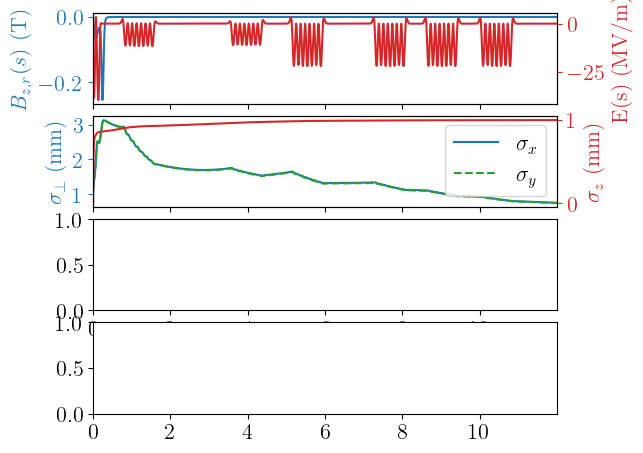

In [16]:
fig=plt.figure(9999)


gs1 = gridspec.GridSpec(8, 13)
ax1 = fig.add_subplot(gs1[0:2,0:13])
ax2 = fig.add_subplot(gs1[2:4,0:13], sharex =ax1)
ax3 = fig.add_subplot(gs1[4:6,0:13], sharex =ax1)
ax4 = fig.add_subplot(gs1[6:8,0:13], sharex =ax1)

#ax4 = fig.add_subplot(gs1[4:7,13:14])

gs1.update(top=0.95, bottom=0.115, left=0.15, right=0.875, hspace=0.3, wspace=0.1)




# axial field sampled by the reference particle
ax1.plot (s, ds.getData('Bz_ref'),'-C0')
ax1.set_ylabel (r'$B_{z,r}(s)$ (T)', color='C0',fontsize=FontSize)
ax1.tick_params('y', colors='C0')
ax1p = ax1.twinx()
ax1p.set_ylabel('E(s) (MV/m)', color='C3',fontsize=FontSize)
ax1p.tick_params('y', colors='C3')
ax1p.plot (s, ds.getData('Ez_ref'),'-C3')
ax1.set_xlim(0, np.max(s))
plt.setp(ax1.get_xticklabels(), visible=False)

# beamsize rms
ax2.plot (s, mm*ds.getData('rms_x'),'-C0',  label=r'$\sigma_x$')
ax2.plot (s, mm*ds.getData('rms_y'),'--C2', label=r'$\sigma_y$')
ax2.legend()
ax2.tick_params('y', colors='C0')
ax2.set_ylabel (r'$\sigma_{\perp}$ (mm)', color='C0',fontsize=FontSize)
ax2p = ax2.twinx()
ax2p.set_ylabel(r'$\sigma_{z}$ (mm)', color='C3',fontsize=FontSize)
ax2p.tick_params('y', colors='C3')
ax2p.plot (s, mm*ds.getData('rms_s'),'-C3')
plt.setp(ax2.get_xticklabels(), visible=False)

# rms emittance 
sigma6 = np.zeros((6,6,len(s)))
sigma4 = np.zeros((4,4,len(s)))
sigmax = np.zeros((2,2,len(s)))
sigmay = np.zeros((2,2,len(s)))
emit6  = np.zeros ((len(s)))
emit4  = np.zeros ((len(s)))
emitx  = np.zeros ((len(s)))
emity  = np.zeros ((len(s)))
curlyL = np.zeros ((len(s)))
eigenemit1 = np.zeros ((len(s)))
eigenemit2 = np.zeros ((len(s)))

#np.set_printoptions(formatter={'float': '{: 0.3e}'.format})

J4=[[ 0., 1., 0., 0.], 
    [-1., 0., 0., 0.],
    [ 0., 0., 0., 1.],
    [ 0., 0.,-1., 0.]]

for k in range(len(s)):
   print(k)
   for j in range(6):
      print(j)
      i=0
      while i<=j:
         cmd="ds.getData('S"+str(i+1)+str(j+1)+"')"
#         print(cmd)
         sigma6[i,j,k]= eval(cmd)[k]
         if i!=j:
            sigma6[j,i,k]= sigma6[i,j,k]
         i=i+1
   sigma4[:,:,k]=sigma6[0:4,0:4,k]
   sigmax[:,:,k]=sigma6[0:2,0:2,k]
   sigmay[:,:,k]=sigma6[2:4,2:4,k]
   emit4[k]=np.linalg.det(sigma4[:,:,k])**(1/4) 
   emitx[k]=np.linalg.det(sigmax[:,:,k])**(1/2) 
   emity[k]=np.linalg.det(sigmay[:,:,k])**(1/2) 
   emit6[k]=np.linalg.det(sigma6[:,:,k])**(1/6)    
     
   curlyL[k] =sigma4[0,3,k]-sigma4[2,1,k] 
   vals, vecs = la.eig(np.dot(J4,sigma4[:,:,k]))
      
   eigenemit1[k]= np.abs(np.imag(vals[0]))
   eigenemit2[k]= np.abs(np.imag(vals[2]))


ax3.plot (s, um*ds.getData('emit_x'),'-C0',  label=r'$\varepsilon_x$')
ax3.plot (s, um*ds.getData('emit_y'),'--C2', label=r'$\varepsilon_y$')
ax3.plot (s, um*emit4,'--C1', label=r'$\sqrt{\varepsilon_4}$')
ax3.legend(loc='center right')
ax3.tick_params('y', colors='C0')
ax3.set_ylabel (r'$\varepsilon_{\perp}$ ($\mu$m)', color='C0',fontsize=FontSize)
ax3p = ax3.twinx()
ax3p.set_ylabel(r'$\varepsilon_{z}$ ($\mu$m)', color='C3',fontsize=FontSize)
ax3p.tick_params('y', colors='C3')
ax3.set_ylim([0, 10]) # np.max(um*(emit4))*1.2])
ax3p.plot (s, um*ds.getData('emit_s'),'-C3')
plt.setp(ax3.get_xticklabels(), visible=False)


ax4.plot (s, ds.getData('energy'),'-C0',  label=r'$\varepsilon_x$')
ax4.tick_params('y', colors='C0')
ax4.set_ylabel (r'$K$ (MeV)', color='C0',fontsize=FontSize)
ax4p = ax4.twinx()
ax4p.set_ylabel(r'$\sigma_{\delta}\times 100$', color='C3',fontsize=FontSize)
ax4p.tick_params('y', colors='C3')
ax4p.plot (s, 100*0.511*ds.getData('rms_ps')/ds.getData('energy'),'-C3')
ax4p.set_ylim([0,2])
ax4.set_xlabel ('distance from photocathode (m)', fontsize=FontSize)

#plt.savefig('idk.png')
plt.show()



## base = '/lstr/sahara/aard/cphillips/'

# base + what kind of charge + num_beams + gun 2 y4 + best of hof
#charge = base + '1nC/1beam/1cath2y4/71BCB0A1DB544C52/'
charge = base + '1nC/1beam/1cath2y4/bebop/ACF8B9D2D5454154/'

output = 'input.stat'


# Doesn't run properly - analysis of PHOTOCATHODE.h5

In [4]:
h5file = charge+'PHOTOCATHODE.h5'

ds = load_dataset('./', fname = filename)
print(ds)

s = ds.getData('s') # path length
h5dat = h5py.File(h5file,'r')


	Statistic dataset.

	Size: 46 x 190

	Available variables (46) :

	Bx_ref              	 Bx-Field component of ref particle
	By_ref              	 By-Field component of ref particle
	Bz_ref              	 Bz-Field component of ref particle
	DDx                 	 Derivative of dispersion in x
	DDy                 	 Derivative of dispersion in y
	DebyeLength         	 Debye length in the boosted frame
	Dx                  	 Dispersion in x
	Dy                  	 Dispersion in y
	Ex_ref              	 Ex-Field component of ref particle
	Ey_ref              	 Ey-Field component of ref particle
	Ez_ref              	 Ez-Field component of ref particle
	charge              	 Bunch Charge
	dE                  	 energy spread of the beam
	dt                  	 time step size
	emit_s              	 Normalized Emittance s
	emit_x              	 Normalized Emittance x
	emit_y              	 Normalized Emittance y
	energy              	 Mean Bunch Energy
	max_s               	 Max Beamsize in s


Data for Full Sim Information: 
x rms =  0.001097193677880002
y rms =  0.001000335122445295
s rms =  4.800124463409623e-09
ps rms =  0.000513599303453345
emit x =  7.191355037761761e-07
emit y =  7.223627637791008e-07
emit s =  1.886289791917453e-12
energy =  4.512316042332341e-07
Num parts =  18
final beta x:  -0.0016034372333821707
[438 443 432 416 397 412 410 409 398 426 441 455 407 413 418 432 449 449
 445 411 401 393 397 411 388 390 403 396 414 406 399 408 423 409 401 385
 362 383 400 397 417 414 427 442 438 422 401 387 404 434 432 421 406 410
 381 396 376 381 390 399 424 440 440 429 465 453 465 453 453 419 438 443
 417 397 373 416 434 433 452 456 424 418 444 425 415 414 415 369 347 321
 260 201 135  80  52  32  18]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

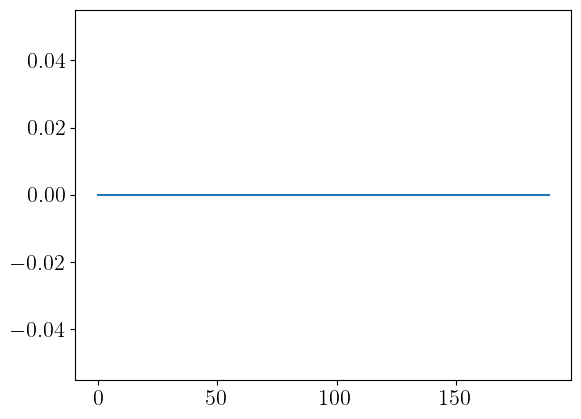

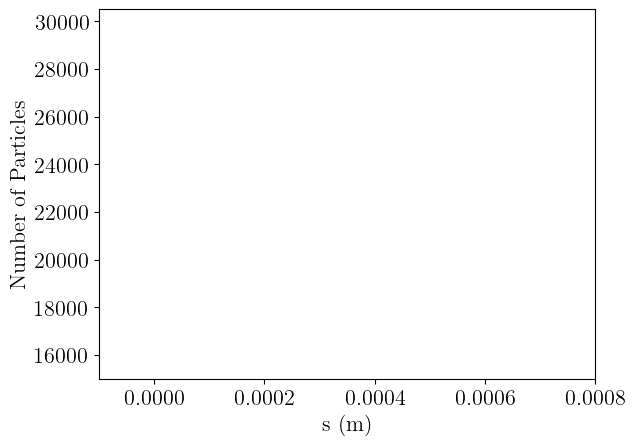

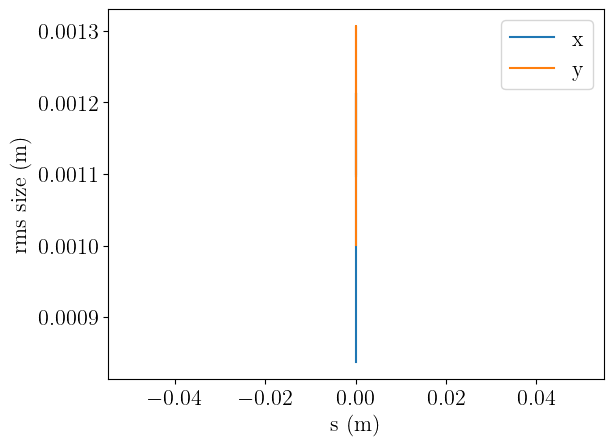

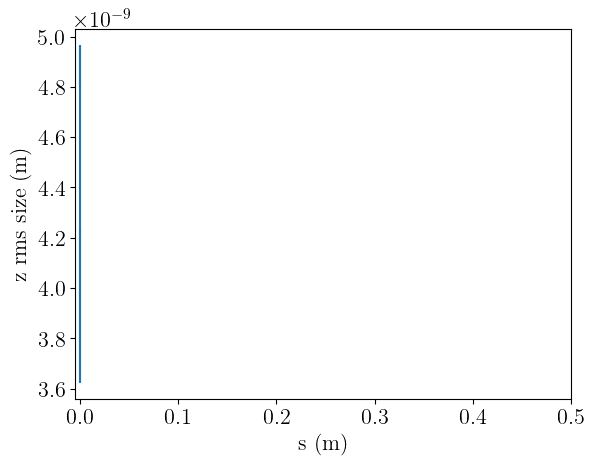

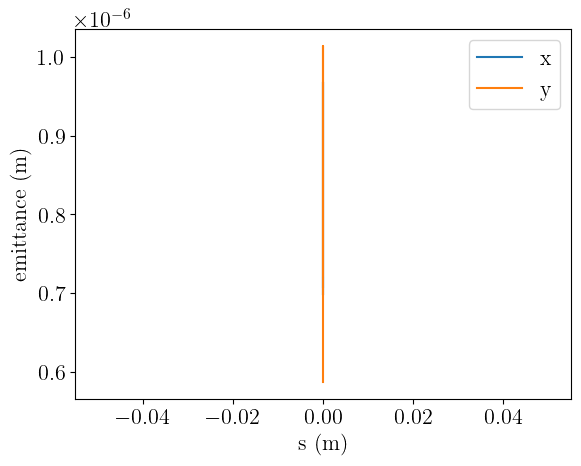

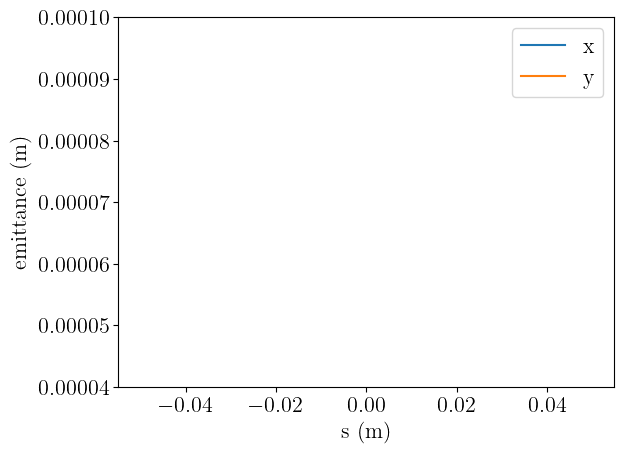

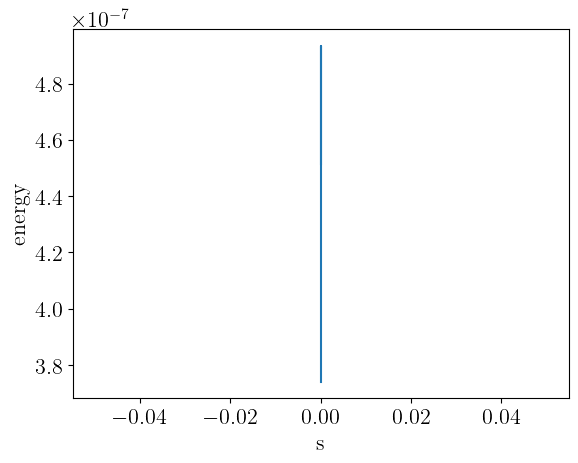

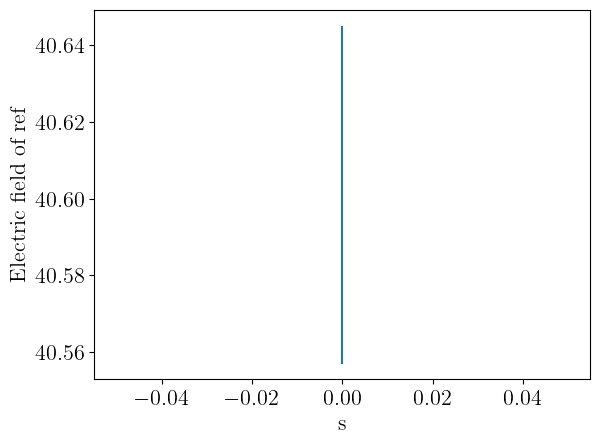

In [6]:
rmsx = ds.getData('rms_x') # m
rmsy = ds.getData('rms_y')
rmss = ds.getData('rms_s')
rmsps = ds.getData('rms_ps')
emitx = ds.getData('emit_x') # normalized emittance x
emity = ds.getData('emit_y') # m
emits = ds.getData('emit_s')
kene = ds.getData('energy')
nparts = ds.getData('numParticles')

print('Data for Full Sim Information: ')
print('x rms = ', rmsx[-1])
print('y rms = ', rmsy[-1])
print('s rms = ', rmss[-1])
print('ps rms = ', rmsps[-1])
print('emit x = ', emitx[-1])
print('emit y = ', emity[-1])
print('emit s = ', emits[-1])
print('energy = ', kene[-1])
print('Num parts = ', nparts[-1])

#pthlen = ds.getData('s')
#time = ds.getData('t')

lts = h5dat['Step#0']
xs = lts['x'][:]
pz = lts['pz'][:]
emitxs = ds.getData('emit_x')[-1]
betaxs = np.average(xs**2)/(emitxs/np.average(pz))
print('final beta x: ', betaxs)

print(nparts[93:200])
print(s[93:200])
print(s[0],s[-1])
print(len(nparts))

evens = np.linspace(0,s[-1],len(s))

plt.figure()
plt.plot(s)
plt.show()

plt.figure()
plt.plot(s,nparts)
plt.xlim([-0.0001,.0008])
plt.ylim([15000,30500])
plt.xlabel('s (m)')
plt.ylabel('Number of Particles')
plt.show()

plt.figure()
plt.plot(s,rmsx,label='x')
plt.plot(s,rmsy,label='y')
#plt.plot(s,rmss, label='s')
plt.xlabel('s (m)')
plt.ylabel('rms size (m)')
plt.legend()
plt.show()

plt.figure()
plt.plot(s,rmss)
plt.xlim([-.005,.5])
plt.xlabel('s (m)')
plt.ylabel('z rms size (m)')
plt.show()

plt.figure()
plt.plot(s,emitx,label='x')
plt.plot(s,emity,label='y')
plt.xlabel('s (m)')
plt.ylabel('emittance (m)')
plt.legend()
plt.show()

plt.figure()
plt.plot(s,emitx,label='x')
plt.plot(s,emity,label='y')
#plt.plot(s[nu:],emitz[nu:],label='z')
plt.xlabel('s (m)')
plt.ylabel('emittance (m)')
plt.ylim([0.00004,0.0001])
plt.legend()
plt.show()

plt.figure()
plt.plot(s,ds.getData('energy'))
plt.xlabel('s')
plt.ylabel('energy')
#plt.savefig('energy.png')
plt.show()

plt.figure()
plt.plot (s, ds.getData('Ez_ref'))
#plt.plot (s, ds.getData('Ex_ref'))
#plt.plot (s, ds.getData('Ey_ref'))
plt.xlabel('s')
plt.ylabel('Electric field of ref')
#plt.savefig('Ez_ref.png')
plt.show()

#plt.figure()
#plt.scatter(pthlen,time)
#plt.xlabel('Path Length (m)')
#plt.ylabel('Time (ns)')
#plt.show()

rms bunch length from .stat file:  4.800124463409623e-09  m
bunch length from calc:  0.0005239212540238049  m
z mean:  -0.07685122678581309  m


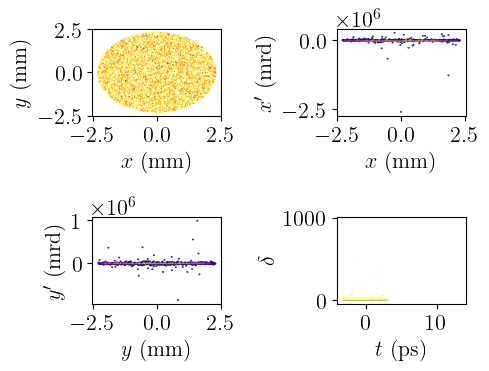

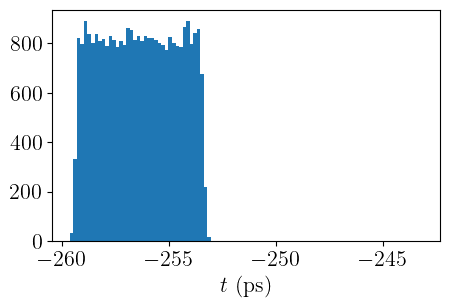

In [7]:
lts = h5dat['Step#0']
xs = lts['x'][:]
ys = lts['y'][:]
zs = lts['z'][:]
px = lts['px'][:]
py = lts['py'][:]
pz = lts['pz'][:]
px = px/pz
py = py/pz
ts = lts['time'][:]

p = np.sqrt(px**2+py**2+pz**2)
p = p/p.mean()-1

tsmean = np.mean(ts)
tszeroed = ts-tsmean

print('rms bunch length from .stat file: ',rmss[-1],' m')
lenx = len(ts)
z_parts = ts*cms
zmean = np.mean(z_parts)
centz = [(i-zmean)**2 for i in z_parts]
sum = np.sum(centz)
rms_zlen = np.sqrt(sum/lenx)
print('bunch length from calc: ',rms_zlen,' m')
print('z mean: ', zmean,' m')
#bulen = np.sqrt(np.average(tims**2))
#print('bunch length: ',bulen,' ns')

nBins = 201
frac = 100
MinCnt = 1+int(len(ts)-frac/100*len(ts))

fig, axlist = plt.subplots(2,2, figsize=(5, 4))
ax = axlist[0, 0]
ax.hexbin(xs*1e3, ys*1e3, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax = axlist[0, 1]
ax.set_xlabel('$x$ (mm)')
ax.set_ylabel('$x\'$ (mrd)')
ax.hexbin(xs*1e3, px*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,0]
ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$y\'$ (mrd)')
ax.hexbin(ys*1e3, py*1e3, gridsize=nBins, mincnt=MinCnt, cmap='plasma')
ax = axlist[1,1]
ax.hexbin(tszeroed*1e12, p, gridsize=nBins, mincnt=MinCnt, cmap='inferno_r')
ax.set_xlabel('$t$ (ps)')
ax.set_ylabel(r'$\delta$')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3))
plt.hist(ts*1e12,bins=100)
plt.xlabel('$t$ (ps)')
plt.show()

In [8]:
#to get bunch length, get rms of time
# need all boxes run to calculate this
bulen = np.sqrt(np.average(ts**2))
print('bunch length: ',bulen,' ns')


betax = np.average(xs**2)/(emitx[-1]/np.average(pz))
betay = np.average(ys**2)/(emity[-1]/np.average(pz))
print('Beta x: ',betax)
print('Beta y: ',betay)

bunch length:  2.56354056247761e-10  ns
Beta x:  -0.0016034372333821707
Beta y:  -0.0015796227761521308


In [9]:
# Plotting Beam from Output (x vs y vs z, and histograms)

#loc = '/lstr/sahara/aard/cphillips/bebop_opal_Eleg/1cath2y4/ACF8B9D2D5454154/' 
fil = opal.datasets.H5Dataset.H5Dataset(charge,'YAG4.h5')
print(fil)
#print(fil.getData('RMSX')[-1])

#print('energy',fil.getData('ENERGY')[-1],fil.getUnit('ENERGY'))
#print(fil.getUnit('z'),fil.getUnit('px'),fil.getUnit('py'),fil.getUnit('pz'))
#print(opal.datasets.H5Dataset.H5Dataset.getUnit('px'))



f = h5py.File(charge+'YAG4.h5','r')
lts = f['Step#0']
xs = lts['x'][:]
ys = lts['y'][:]
zs = lts['z'][:]
px = lts['px'][:]
py = lts['py'][:]
pz = lts['pz'][:]
px = px/pz
py = py/pz
ts = lts['time'][:]

plt.figure()
plt.scatter(xs*1e3,ts*1e12)
plt.xlabel('x (mm)')
plt.ylabel('t (ps)')
plt.show()

plt.figure()
plt.scatter(ys*1e3,ts*1e12)
plt.xlabel('y (mm)')
plt.ylabel('t (ps)')
plt.show()

plt.figure()
plt.scatter(xs*1e3,ys*1e3)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

plt.figure()
plt.hist(xs*1e3, bins = 100)
plt.xlabel('x (mm)')
plt.show()

plt.figure()
plt.hist(ys*1e3, bins = 100)
plt.xlabel('y (mm)')
plt.show()

plt.figure()
plt.hist(ts*1e12, bins = 100)
plt.xlabel('t (ps)')
plt.show()

print(ts[:15])

print('max t: ',np.max(ts),' s')
print('min t: ',np.min(ts),' s')
print('mean t: ',np.mean(ts),' s')


#plt.figure()
#plt.hist(zs, bins = 100)
#plt.xlabel('z (m)')
#plt.xlim([-.5e-19,.5e-19])
#plt.show()

2024-11-12 13:45:41,996 - opal - ERROR - File '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/timescan/301steps/tstep_50/YAG4.h5' does not exist.
Traceback (most recent call last):
  File "/lstr/sahara/aard/philippe/codes/pyOPALTools/opal/datasets/DatasetBase.py", line 40, in __init__
    raise RuntimeError("File '" + full_path + "' does not exist.")
RuntimeError: File '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/timescan/301steps/tstep_50/YAG4.h5' does not exist.


AttributeError: 'H5Dataset' object has no attribute '_directory'

/tmp/ipykernel_3941236/1668316513.py:25: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax1.set_xlim(0, np.max(s))
2024-11-12 13:46:00,264 - opal - ERROR - The variable 'S11' is not in dataset.
Traceback (most recent call last):
  File "/lstr/sahara/aard/philippe/codes/pyOPALTools/opal/datasets/SDDSDatasetBase.py", line 78, in getData
    raise RuntimeError("The variable '" + var + "' is not in dataset.")
RuntimeError: The variable 'S11' is not in dataset.


0
0


IndexError: list index out of range

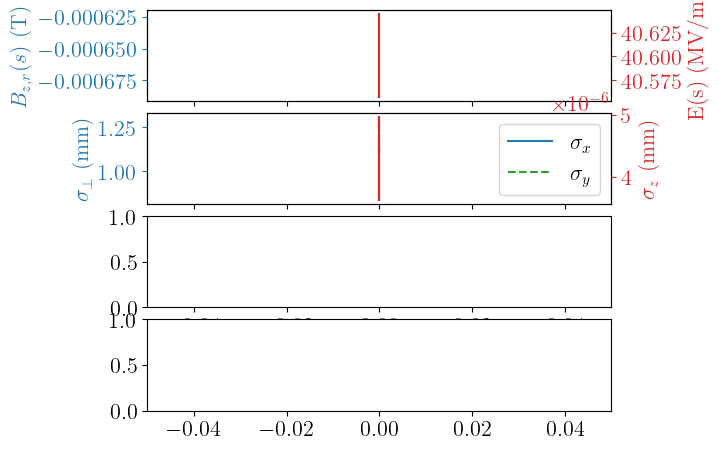

In [10]:
fig=plt.figure(9999)


gs1 = gridspec.GridSpec(8, 13)
ax1 = fig.add_subplot(gs1[0:2,0:13])
ax2 = fig.add_subplot(gs1[2:4,0:13], sharex =ax1)
ax3 = fig.add_subplot(gs1[4:6,0:13], sharex =ax1)
ax4 = fig.add_subplot(gs1[6:8,0:13], sharex =ax1)

#ax4 = fig.add_subplot(gs1[4:7,13:14])

gs1.update(top=0.95, bottom=0.115, left=0.15, right=0.875, hspace=0.3, wspace=0.1)




# axial field sampled by the reference particle
ax1.plot (s, ds.getData('Bz_ref'),'-C0')
ax1.set_ylabel (r'$B_{z,r}(s)$ (T)', color='C0',fontsize=FontSize)
ax1.tick_params('y', colors='C0')
ax1p = ax1.twinx()
ax1p.set_ylabel('E(s) (MV/m)', color='C3',fontsize=FontSize)
ax1p.tick_params('y', colors='C3')
ax1p.plot (s, ds.getData('Ez_ref'),'-C3')
ax1.set_xlim(0, np.max(s))
plt.setp(ax1.get_xticklabels(), visible=False)

# beamsize rms
ax2.plot (s, mm*ds.getData('rms_x'),'-C0',  label=r'$\sigma_x$')
ax2.plot (s, mm*ds.getData('rms_y'),'--C2', label=r'$\sigma_y$')
ax2.legend()
ax2.tick_params('y', colors='C0')
ax2.set_ylabel (r'$\sigma_{\perp}$ (mm)', color='C0',fontsize=FontSize)
ax2p = ax2.twinx()
ax2p.set_ylabel(r'$\sigma_{z}$ (mm)', color='C3',fontsize=FontSize)
ax2p.tick_params('y', colors='C3')
ax2p.plot (s, mm*ds.getData('rms_s'),'-C3')
plt.setp(ax2.get_xticklabels(), visible=False)

# rms emittance 
sigma6 = np.zeros((6,6,len(s)))
sigma4 = np.zeros((4,4,len(s)))
sigmax = np.zeros((2,2,len(s)))
sigmay = np.zeros((2,2,len(s)))
emit6  = np.zeros ((len(s)))
emit4  = np.zeros ((len(s)))
emitx  = np.zeros ((len(s)))
emity  = np.zeros ((len(s)))
curlyL = np.zeros ((len(s)))
eigenemit1 = np.zeros ((len(s)))
eigenemit2 = np.zeros ((len(s)))

#np.set_printoptions(formatter={'float': '{: 0.3e}'.format})

J4=[[ 0., 1., 0., 0.], 
    [-1., 0., 0., 0.],
    [ 0., 0., 0., 1.],
    [ 0., 0.,-1., 0.]]

for k in range(len(s)):
   print(k)
   for j in range(6):
      print(j)
      i=0
      while i<=j:
         cmd="ds.getData('S"+str(i+1)+str(j+1)+"')"
#         print(cmd)
         sigma6[i,j,k]= eval(cmd)[k]
         if i!=j:
            sigma6[j,i,k]= sigma6[i,j,k]
         i=i+1
   sigma4[:,:,k]=sigma6[0:4,0:4,k]
   sigmax[:,:,k]=sigma6[0:2,0:2,k]
   sigmay[:,:,k]=sigma6[2:4,2:4,k]
   emit4[k]=np.linalg.det(sigma4[:,:,k])**(1/4) 
   emitx[k]=np.linalg.det(sigmax[:,:,k])**(1/2) 
   emity[k]=np.linalg.det(sigmay[:,:,k])**(1/2) 
   emit6[k]=np.linalg.det(sigma6[:,:,k])**(1/6)    
     
   curlyL[k] =sigma4[0,3,k]-sigma4[2,1,k] 
   vals, vecs = la.eig(np.dot(J4,sigma4[:,:,k]))
      
   eigenemit1[k]= np.abs(np.imag(vals[0]))
   eigenemit2[k]= np.abs(np.imag(vals[2]))


ax3.plot (s, um*ds.getData('emit_x'),'-C0',  label=r'$\varepsilon_x$')
ax3.plot (s, um*ds.getData('emit_y'),'--C2', label=r'$\varepsilon_y$')
ax3.plot (s, um*emit4,'--C1', label=r'$\sqrt{\varepsilon_4}$')
ax3.legend(loc='center right')
ax3.tick_params('y', colors='C0')
ax3.set_ylabel (r'$\varepsilon_{\perp}$ ($\mu$m)', color='C0',fontsize=FontSize)
ax3p = ax3.twinx()
ax3p.set_ylabel(r'$\varepsilon_{z}$ ($\mu$m)', color='C3',fontsize=FontSize)
ax3p.tick_params('y', colors='C3')
ax3.set_ylim([0, 10]) # np.max(um*(emit4))*1.2])
ax3p.plot (s, um*ds.getData('emit_s'),'-C3')
plt.setp(ax3.get_xticklabels(), visible=False)


ax4.plot (s, ds.getData('energy'),'-C0',  label=r'$\varepsilon_x$')
ax4.tick_params('y', colors='C0')
ax4.set_ylabel (r'$K$ (MeV)', color='C0',fontsize=FontSize)
ax4p = ax4.twinx()
ax4p.set_ylabel(r'$\sigma_{\delta}\times 100$', color='C3',fontsize=FontSize)
ax4p.tick_params('y', colors='C3')
ax4p.plot (s, 100*0.511*ds.getData('rms_ps')/ds.getData('energy'),'-C3')
ax4p.set_ylim([0,2])
ax4.set_xlabel ('distance from photocathode (m)', fontsize=FontSize)

#plt.savefig('idk.png')
plt.show()

